In [1]:
import sys
import time
import pickle
from pathlib import Path

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [3]:
font = {'family': 'Arial',
        'weight': 'normal',
        'size': 14}
plt.rc('font', **font)

In [4]:
sys.path.append(str(Path().resolve().parent))

In [5]:
from torsion.model import get_model
from torsion.utils.plotting import plot_energy_profile

### Load Training and Test Datasets

In [6]:
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')

### Scale Features

In [7]:
scaler_file = 'scaler.pkl'

In [8]:
with open(scaler_file, 'rb') as fptr:
    scaler = pickle.load(fptr)

In [9]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Load Trained Model

In [10]:
model_file = 'model.h5'

In [11]:
model = tf.keras.models.load_model(model_file)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2930)              861420    
_________________________________________________________________
batch_normalization (BatchNo (None, 2930)              11720     
_________________________________________________________________
dropout (Dropout)            (None, 2930)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1465)              4293915   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1465)              5860      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1465)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 293)               4

### Performance on Training Dataset

In [12]:
y_train_pred = model.predict(X_train).flatten()

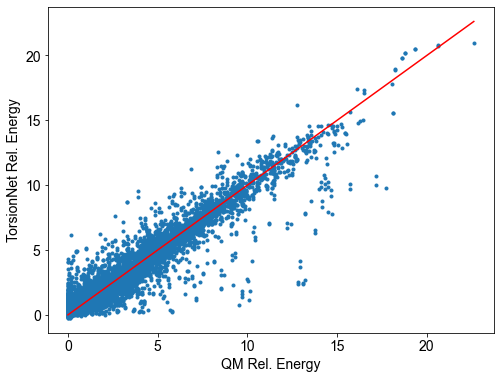

In [13]:
ax_max = max(y_train.max(), y_train_pred.max())

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(y_train, y_train_pred, '.')
ax1.plot([0, ax_max], [0, ax_max], 'r-')
ax1.set_xlabel("QM Rel. Energy")
ax1.set_ylabel("TorsionNet Rel. Energy");

### Performance on Test Dataset

In [14]:
y_test_pred = model.predict(X_test).flatten()

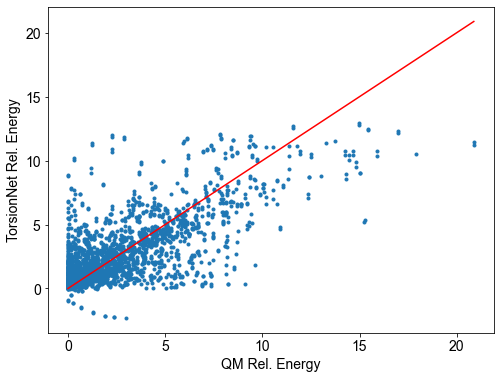

In [15]:
ax_max = max(y_test.max(), y_test_pred.max())

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(y_test, y_test_pred, '.')
ax1.plot([0, ax_max], [0, ax_max], 'r-')
ax1.set_xlabel("QM Rel. Energy")
ax1.set_ylabel("TorsionNet Rel. Energy");

### Sample Predicted Profiles

In [16]:
y_test_profiles = y_test.reshape(-1, 24)

In [17]:
y_test_profiles_pred = y_test_pred.reshape(-1, 24)

In [18]:
angles = np.linspace(-165, 180, 24)

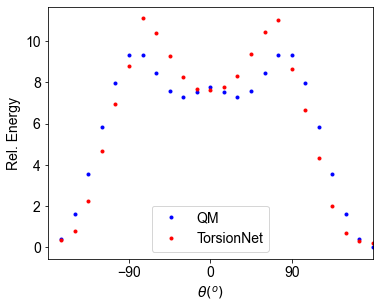

In [19]:
profile_idx = 0


fig = plt.figure(figsize=(2*2.75,2*2.25))
ax = fig.add_subplot(111)
ax.plot(angles, y_test_profiles[profile_idx], 'b.', label='QM')
ax.plot(angles, y_test_profiles_pred[profile_idx], 'r.', label='TorsionNet')
ax.set_xticks([-90, 0, 90])
ax.set_xlim([-180, 180])
ax.set_xlabel(r"$\theta (^o)$")
ax.set_ylabel("Rel. Energy")
ax.legend(loc='best')
fig.tight_layout()